In [81]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold,train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import warnings
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold,train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import warnings
import matplotlib.pyplot as plt

In [82]:
warnings.filterwarnings("ignore")

In [83]:
data=pd.read_csv("boston.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [84]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [85]:
train_data,val_data=train_test_split(data,test_size=0.2,random_state=11)

x_train=train_data.drop("PRICE",axis=1)
y_train=train_data["PRICE"]

x_val=val_data.drop("PRICE",axis=1)
y_val=val_data["PRICE"]



In [86]:
mae_train_value={}

mae_val_value={}

In [87]:
dt_params={"criterion":"mae",
          "random_state":11,
          "min_samples_leaf":15}
dt=DecisionTreeRegressor(**dt_params)

dt.fit(x_train,y_train)



mae_train_value["mae_dt"] = mean_absolute_error(y_train,dt.predict(x_train))
mae_val_value["mae_dt"] = mean_absolute_error(y_val,dt.predict(x_val))

In [88]:
knn_params={
    "n_neighbors":5
}

knn=KNeighborsRegressor(**knn_params)


knn.fit(x_train,y_train)



mae_train_value["mae_knn"] = mean_absolute_error(y_train,knn.predict(x_train))
mae_val_value["mae_knn"] = mean_absolute_error(y_val,knn.predict(x_val))



In [89]:
rf_params={"criterion":"mae",
          "random_state":11,
           "max_features":"sqrt",
           "n_estimators":20,
           "n_jobs":-1,
           "min_samples_leaf":10
    
}

rf=RandomForestRegressor(**rf_params)


rf.fit(x_train,y_train)



mae_train_value["mae_rf"] = mean_absolute_error(y_train,rf.predict(x_train))
mae_val_value["mae_rf"] = mean_absolute_error(y_val,rf.predict(x_val))

In [90]:
gbr_params={
    "random_state":11,
    "n_estimators":20,
   "criterion":"mae",
    "max_features":"sqrt",
    "min_samples_leaf":10
}


gbr=GradientBoostingRegressor(**gbr_params)


gbr.fit(x_train,y_train)



mae_train_value["mae_gbr"] = mean_absolute_error(y_train,gbr.predict(x_train))
mae_val_value["mae_gbr"] = mean_absolute_error(y_val,gbr.predict(x_val))

In [91]:
mae_train_value

{'mae_dt': 2.384405940594059,
 'mae_knn': 3.4555445544554453,
 'mae_rf': 2.3161200495049505,
 'mae_gbr': 2.452970150677511}

In [92]:
mae_val_value

{'mae_dt': 3.282352941176471,
 'mae_knn': 3.978039215686274,
 'mae_rf': 3.029828431372549,
 'mae_gbr': 3.0544773726460575}

In [93]:
kf=KFold(n_splits=5,random_state=11)
x_train_meta=x_train.copy()

x_train_meta["dt_meta"]=-1

x_train_meta["knn_meta"]=-1

x_train_meta["rf_meta"]=-1

x_train_meta["gbr_meta"]=-1


for train_indices,val_indices in kf.split(x_train):
    kf_x_train,kf_x_val=x_train.iloc[train_indices],x_train.iloc[val_indices]
    kf_y_train,kf_y_val=y_train.iloc[train_indices],y_train.iloc[val_indices]
    
    dt.fit(kf_x_train,kf_y_train)
    x_train_meta["dt_meta"].iloc[val_indices]=(dt.predict(kf_x_val))
    
    
    knn.fit(kf_x_train,kf_y_train)
    x_train_meta["knn_meta"].iloc[val_indices]=(knn.predict(kf_x_val))
    
    rf.fit(kf_x_train,kf_y_train)
    x_train_meta["rf_meta"].iloc[val_indices]=(rf.predict(kf_x_val))
    
    gbr.fit(kf_x_train,kf_y_train)
    x_train_meta["gbr_meta"].iloc[val_indices]=(gbr.predict(kf_x_val))
    



    
    

In [94]:
x_train_meta.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,dt_meta,knn_meta,rf_meta,gbr_meta
188,0.12579,45.0,3.44,0.0,0.437,6.556,29.1,4.5667,5.0,398.0,15.2,382.84,4.56,26.2,28.32,28.7650,26.282249
319,0.47547,0.0,9.90,0.0,0.544,6.113,58.8,4.0019,4.0,304.0,18.4,396.23,12.73,19.5,20.08,21.0575,21.347682
21,0.85204,0.0,8.14,0.0,0.538,5.965,89.2,4.0123,4.0,307.0,21.0,392.53,13.83,20.4,18.36,18.1950,19.155077
14,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26,21.4,30.36,19.3325,20.244535
369,5.66998,0.0,18.10,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,26.2,26.28,22.0575,30.220105


In [95]:
x_val_meta=x_val.copy()



dt.fit(x_train,y_train)
x_val_meta["dt_meta"]=dt.predict(x_val)
    
knn.fit(x_train,y_train)
x_val_meta["knn_meta"]=knn.predict(x_val)
    
rf.fit(x_train,y_train)
x_val_meta["rf_meta"]=rf.predict(x_val)
    
gbr.fit(x_train,y_train)
x_val_meta["gbr_meta"]=gbr.predict(x_val)





In [96]:
x_val_meta.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,dt_meta,knn_meta,rf_meta,gbr_meta
53,0.04981,21.0,5.64,0.0,0.439,5.998,21.4,6.8147,4.0,243.0,16.8,396.90,8.43,19.40,27.08,22.3800,22.507360
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68,16.55,17.46,15.7075,16.360209
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38,28.20,21.84,26.8725,27.424254
375,19.60910,0.0,18.10,0.0,0.671,7.313,97.9,1.3163,24.0,666.0,20.2,396.90,13.44,28.20,10.50,21.5325,21.447391
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64,10.20,14.70,11.2800,11.342437


In [97]:
lr=LinearRegression(normalize=True)
lr.fit(x_train_meta,y_train)



mae_train_value["mae_lr"] = mean_absolute_error(y_train,lr.predict(x_train_meta))
mae_val_value["mae_lr"] = mean_absolute_error(y_val,lr.predict(x_val_meta))





In [98]:
mae_train_value

{'mae_dt': 2.384405940594059,
 'mae_knn': 3.4555445544554453,
 'mae_rf': 2.3161200495049505,
 'mae_gbr': 2.452970150677511,
 'mae_lr': 2.2480863500412824}

In [99]:
mae_val_value

{'mae_dt': 3.282352941176471,
 'mae_knn': 3.978039215686274,
 'mae_rf': 3.029828431372549,
 'mae_gbr': 3.0544773726460575,
 'mae_lr': 2.85243036453879}

In [100]:
model=pd.concat([pd.Series(mae_train_value),pd.Series(mae_val_value)], axis=1)
model.columns=["train","val"]


In [101]:
model

,train,val
mae_dt,2.384406,3.282353
mae_knn,3.455545,3.978039
mae_rf,2.316120,3.029828
mae_gbr,2.452970,3.054477
mae_lr,2.248086,2.852430


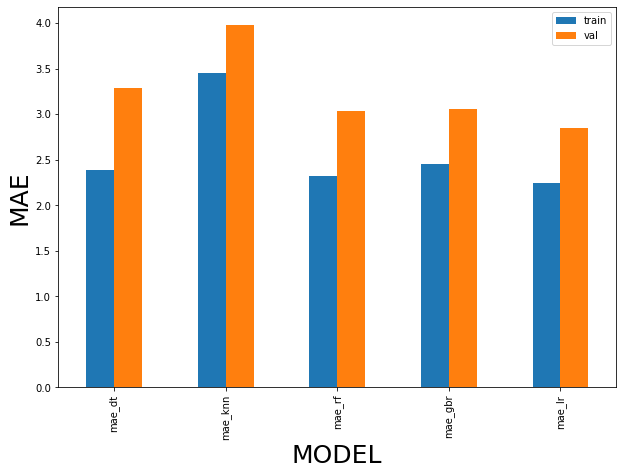

In [103]:
model.plot(kind="bar",figsize=(10,7))
plt.ylabel("MAE",fontsize=25)
plt.xlabel("MODEL",fontsize=25)
plt.show()